In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from copy import deepcopy
import random

# %matplotlib notebook
%matplotlib inline

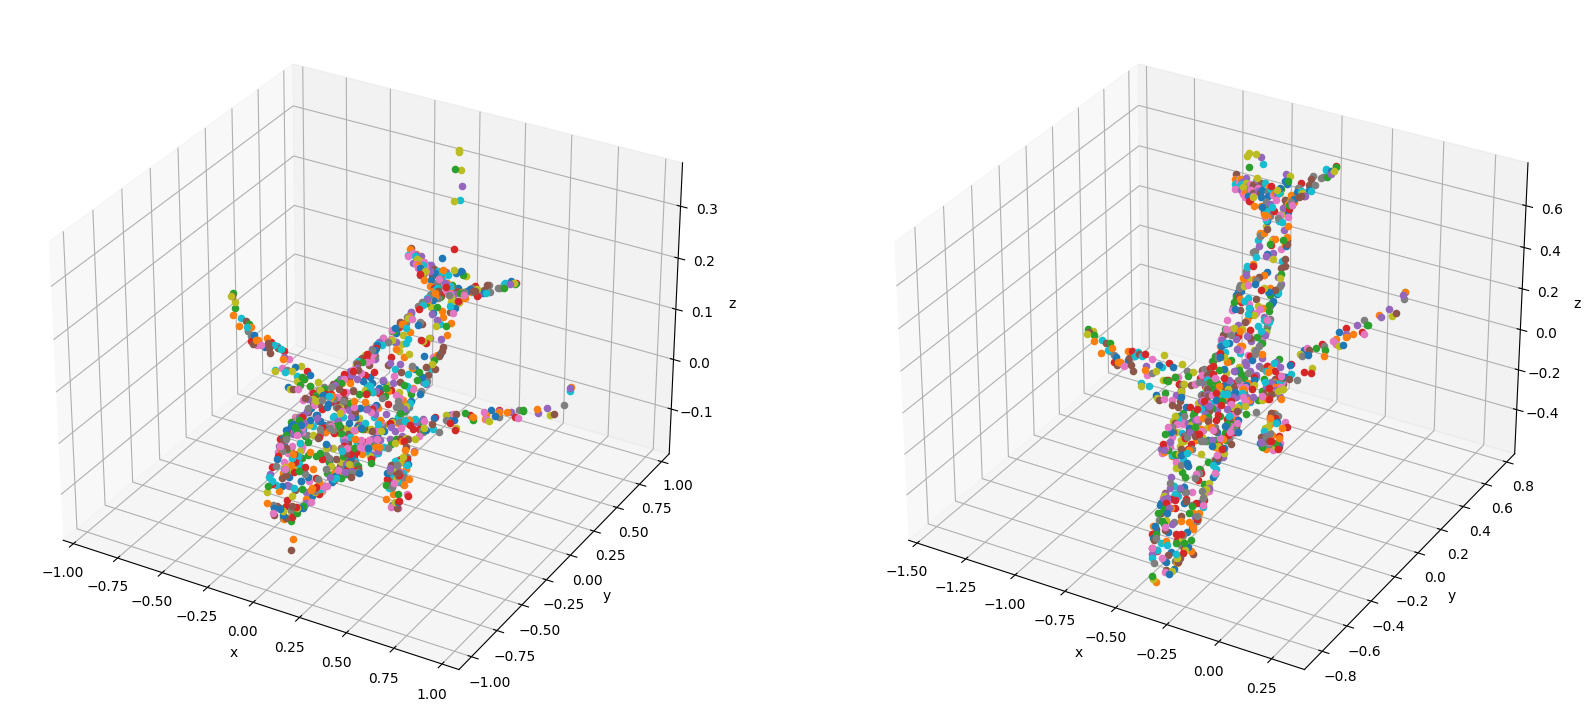

In [2]:
with open('cloud_examples/airplane_no_noise/P.obj') as in_file:
    raw_data = in_file.read()
    
dataP = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

with open('cloud_examples/airplane_no_noise/Q.obj') as in_file:
    raw_data = in_file.read()
    
dataQ = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for point in dataP:
    ax.scatter3D(*point)
    
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in dataQ:
    ax.scatter3D(*point)
    
None

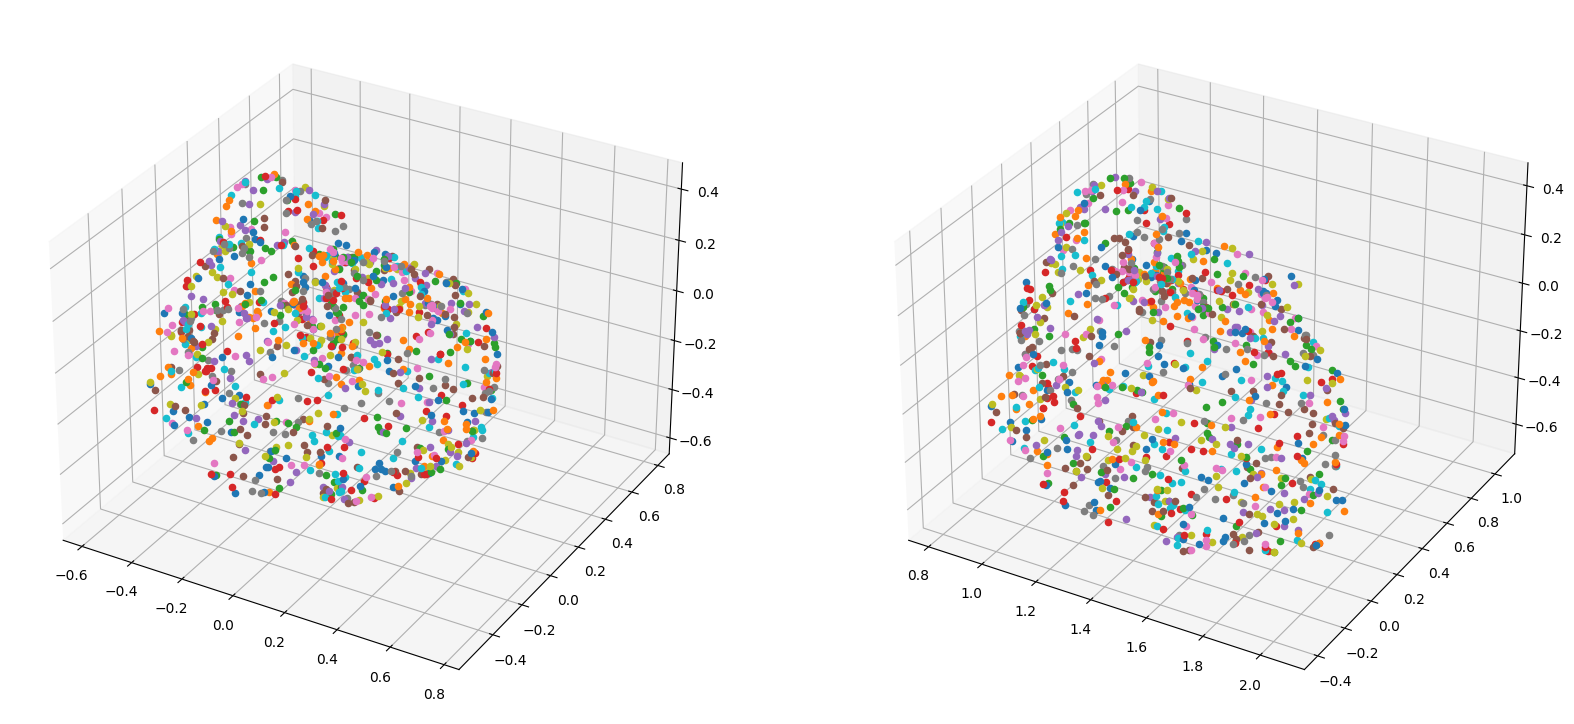

In [9]:
with open('cloud_examples/bunny_no_noise/P.obj') as in_file:
    raw_data = in_file.read()
    
dataP = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

with open('cloud_examples/bunny_no_noise/Q.obj') as in_file:
    raw_data = in_file.read()
    
dataQ = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

fig = plt.figure(figsize=(20, 12))


ax = fig.add_subplot(1, 2, 1, projection='3d')

for point in dataP:
    ax.scatter3D(*point)
    
ax = fig.add_subplot(1, 2, 2, projection='3d')

for point in dataQ:
    ax.scatter3D(*point)
    
None


In [3]:
with open('cloud_examples/airplane_no_noise/P.obj') as in_file:
    raw_data = in_file.read()
    
dataP = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

with open('cloud_examples/airplane_no_noise/Q.obj') as in_file:
    raw_data = in_file.read()
    
dataQ = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

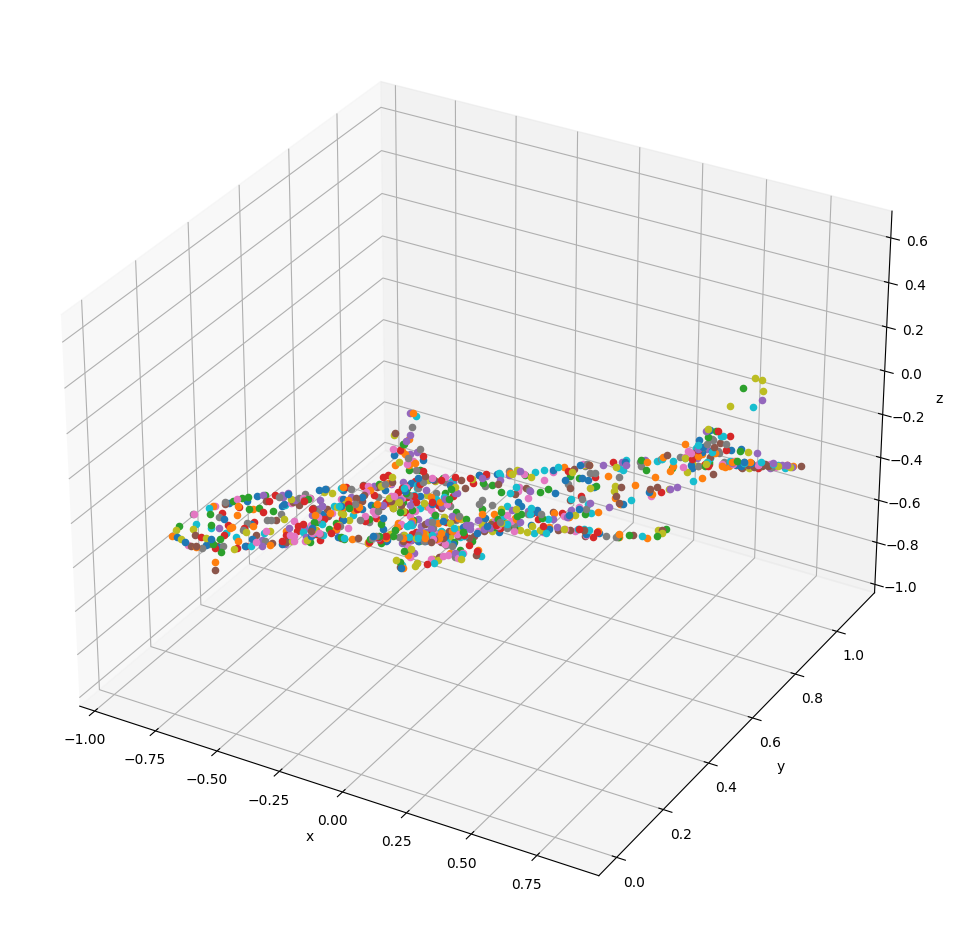

In [4]:
# phi = 5 * math.pi / 180.0
alpha = 15 * math.pi / 180.0
betta = 30 * math.pi / 180.0
gamma = 90 * math.pi / 180.0
Mx = np.array([[1, 0, 0], [0, math.cos(alpha), -math.sin(alpha)], [0, math.sin(alpha), math.cos(alpha)]])
My = np.array([[math.cos(betta), 0 , math.sin(betta)], [0, 1, 0], [-math.sin(betta), 0, math.cos(betta)]])
Mz = np.array([[math.cos(gamma), -math.sin(gamma) , 0], [math.sin(gamma), math.cos(gamma), 0], [0, 0, 1]])
Q = np.array(dataQ).dot(Mx).dot(My).dot(Mz)

fig = plt.figure(figsize=(20, 12))
    
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in Q:
    ax.scatter3D(*point)
    
None

In [59]:
import tensorflow as tf
import keras



In [6]:
Q = np.array(dataQ)
P = np.array(dataP)
# R = P.dot(np.linalg.pinv(Q1))


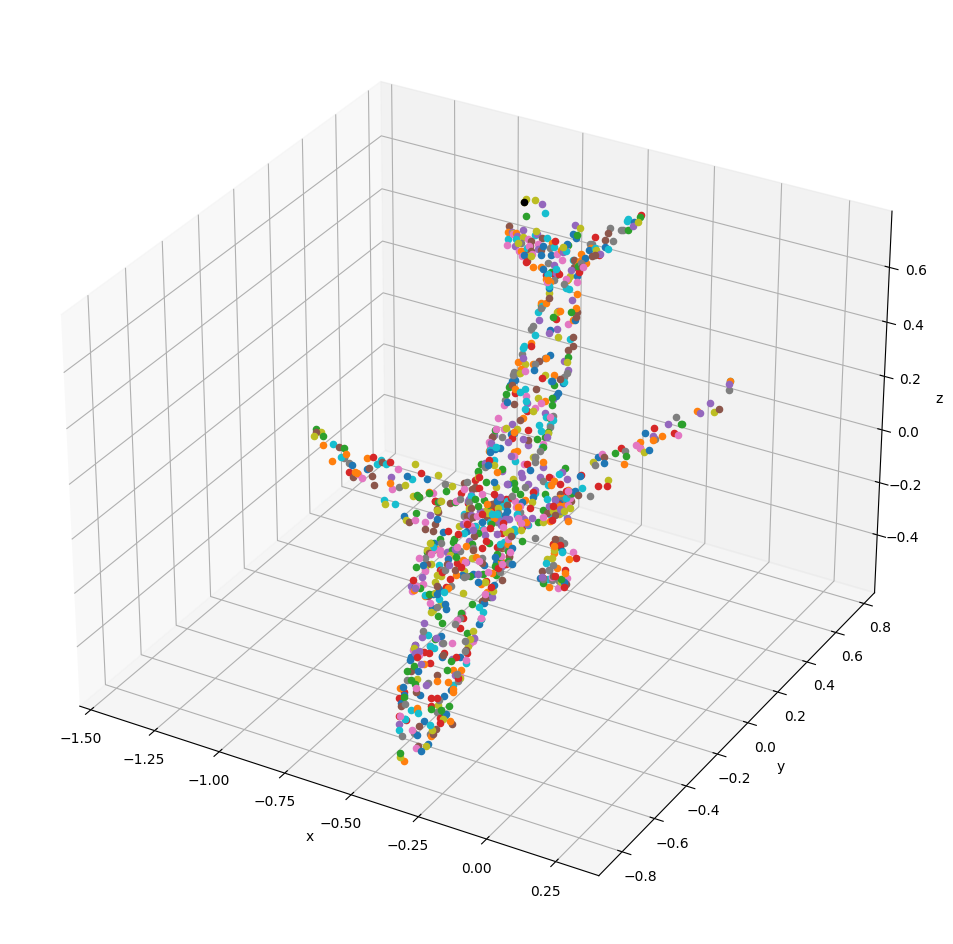

In [7]:
fig = plt.figure(figsize=(20, 12))
    
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in Q:
    ax.scatter3D(*point)
    
ax.scatter3D(*[-0.759237,  0.517774,  0.710568], color='black')
    
None

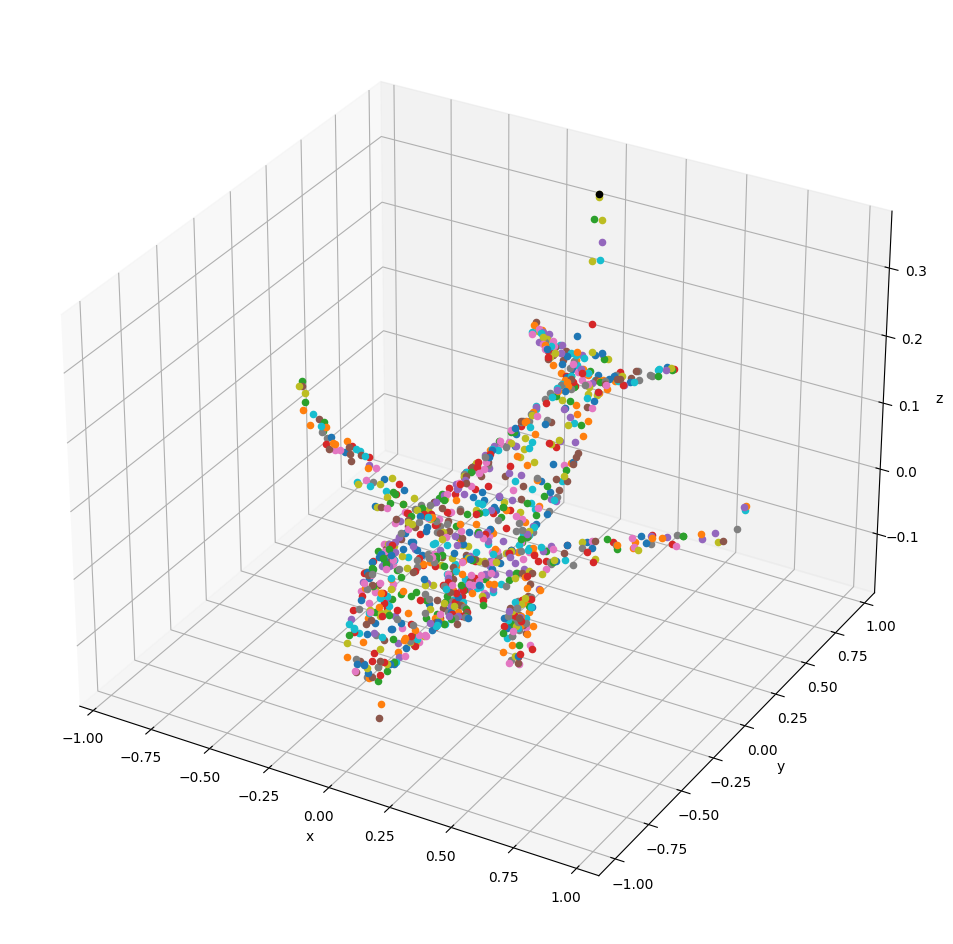

In [8]:
fig = plt.figure(figsize=(20, 12))
    
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in P:
    ax.scatter3D(*point)
    
ax.scatter3D(*[0.013, 0.849, 0.346], color='black')
    
None

In [9]:
q = Q[0].reshape((3, 1))
p = P[0].reshape((3, 1))

In [10]:
x, y, z = [_[0] for _ in Q], [_[1] for _ in Q], [_[2] for _ in Q]
x = sum(x)/len(x)
y = sum(y)/len(y)
z = sum(z)/len(z)

middle_q = [x, y, z]

x, y, z = [_[0] for _ in P], [_[1] for _ in P], [_[2] for _ in P]
x = sum(x)/len(x)
y = sum(y)/len(y)
z = sum(z)/len(z)

middle_p = [x, y, z]

middle_q, middle_p

([-0.5199963375781254, -0.01001669521191406, -1.5130779296874128e-05],
 [-9.765624999876545e-07, -2.2460937500012814e-05, -3.906250000000803e-06])

In [11]:
sorted_p = sorted(P, key=lambda _: np.linalg.norm(_) - np.linalg.norm(middle_p), reverse=True)
sorted_q = sorted(Q, key=lambda _: np.linalg.norm(_) - np.linalg.norm(middle_q), reverse=True)

In [12]:
sorted_p[0], sorted_p[1], sorted_p[0] - sorted_p[1]

(array([-0.301,  0.947,  0.109]),
 array([0.951, 0.238, 0.08 ]),
 array([-1.252,  0.709,  0.029]))

In [13]:
farthest_point_q = Q[0]
max_len_q = np.linalg.norm(farthest_point_q - middle_q)

for point in Q:
    norm = np.linalg.norm(point - middle_q)
    if norm > max_len_q:
        farthest_point_q = point
        max_len_q = norm
        
max_len_q, farthest_point_q

(0.9996668888861174, array([-0.963689,  0.759982,  0.457776]))

In [14]:
farthest_point_p = P[0]
max_len_p = np.linalg.norm(farthest_point_p - middle_p)

for point in P:
    norm = np.linalg.norm(point - middle_p)
    if norm > max_len_p:
        farthest_point_p = point
        max_len_p = norm
        
max_len_p, farthest_point_p

(0.9996668471086786, array([-0.301,  0.947,  0.109]))

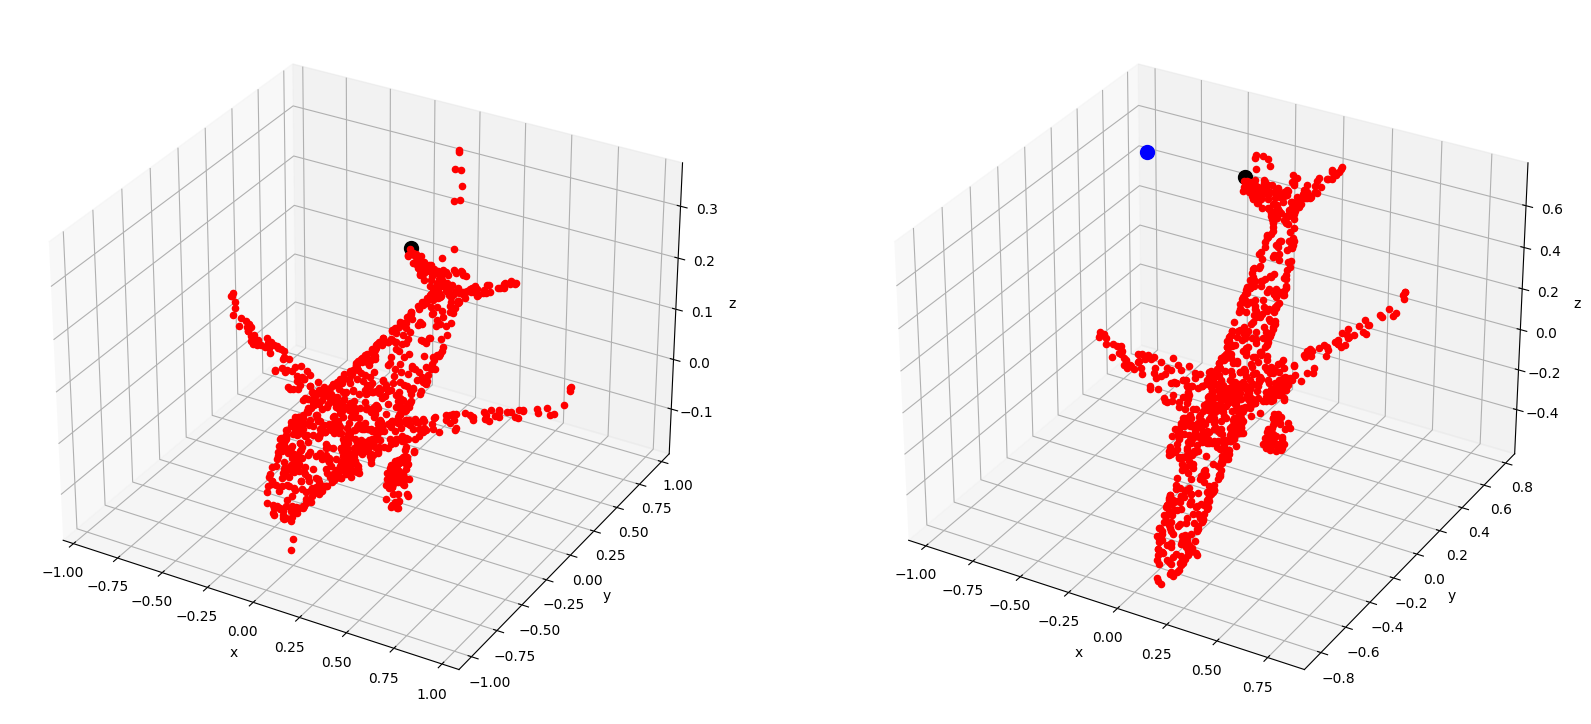

In [15]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for point in P:
    ax.scatter3D(*point, color='red')
    
ax.scatter3D(*farthest_point_p, color='black', s=100)
# ax.scatter3D(*middle_p, color='blue', s=100)
# ax.scatter3D(*sorted_p[0], color='green', s=100)
# ax.scatter3D(*sorted_p[1], color='y', s=100)

    
    
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in Q:
    ax.scatter3D(*point - middle_q, color='red')

ax.scatter3D(*(farthest_point_q - middle_q), color='black', s=100)
ax.scatter3D(*farthest_point_q, color='blue', s=100)

# ax.scatter3D(*middle_q, color='blue', s=100)
# ax.scatter3D(*sorted_q[0], color='green', s=100)
# ax.scatter3D(*sorted_q[1], color='y', s=100)

    
    
None

In [16]:
norm_Q = [_ - middle_q for _ in Q]
norm_farthest_point_q = farthest_point_q - middle_q

In [17]:
q = norm_farthest_point_q.reshape((3, 1))
p = farthest_point_q.reshape((3, 1))
R = q @ np.linalg.pinv(p)
R

array([[ 0.24919849, -0.19652228, -0.11837542],
       [-0.43246717,  0.34105117,  0.20543255],
       [-0.25711684,  0.20276684,  0.12213683]])

In [18]:
np.linalg.norm(farthest_point_p), np.linalg.norm(norm_farthest_point_q)

(0.99964543714259, 0.9996668888861174)

In [19]:
E = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
T = np.array([[1, 0, 0], [0, 1, 0], [0, 0, -1]])

In [20]:
def derx(point, eps=0.0001):
    return 

In [21]:
def getR(alpha, betta, gamma):
    Mx = np.array([[1, 0, 0], [0, math.cos(alpha), -math.sin(alpha)], [0, math.sin(alpha), math.cos(alpha)]])
    My = np.array([[math.cos(betta), 0 , math.sin(betta)], [0, 1, 0], [-math.sin(betta), 0, math.cos(betta)]])
    Mz = np.array([[math.cos(gamma), -math.sin(gamma) , 0], [math.sin(gamma), math.cos(gamma), 0], [0, 0, 1]])
    return Mx @ My @ Mz

In [22]:
def func(alpha, betta, gamma):
    return np.linalg.norm(farthest_point_q - getR(alpha, betta, gamma) @ norm_farthest_point_q)

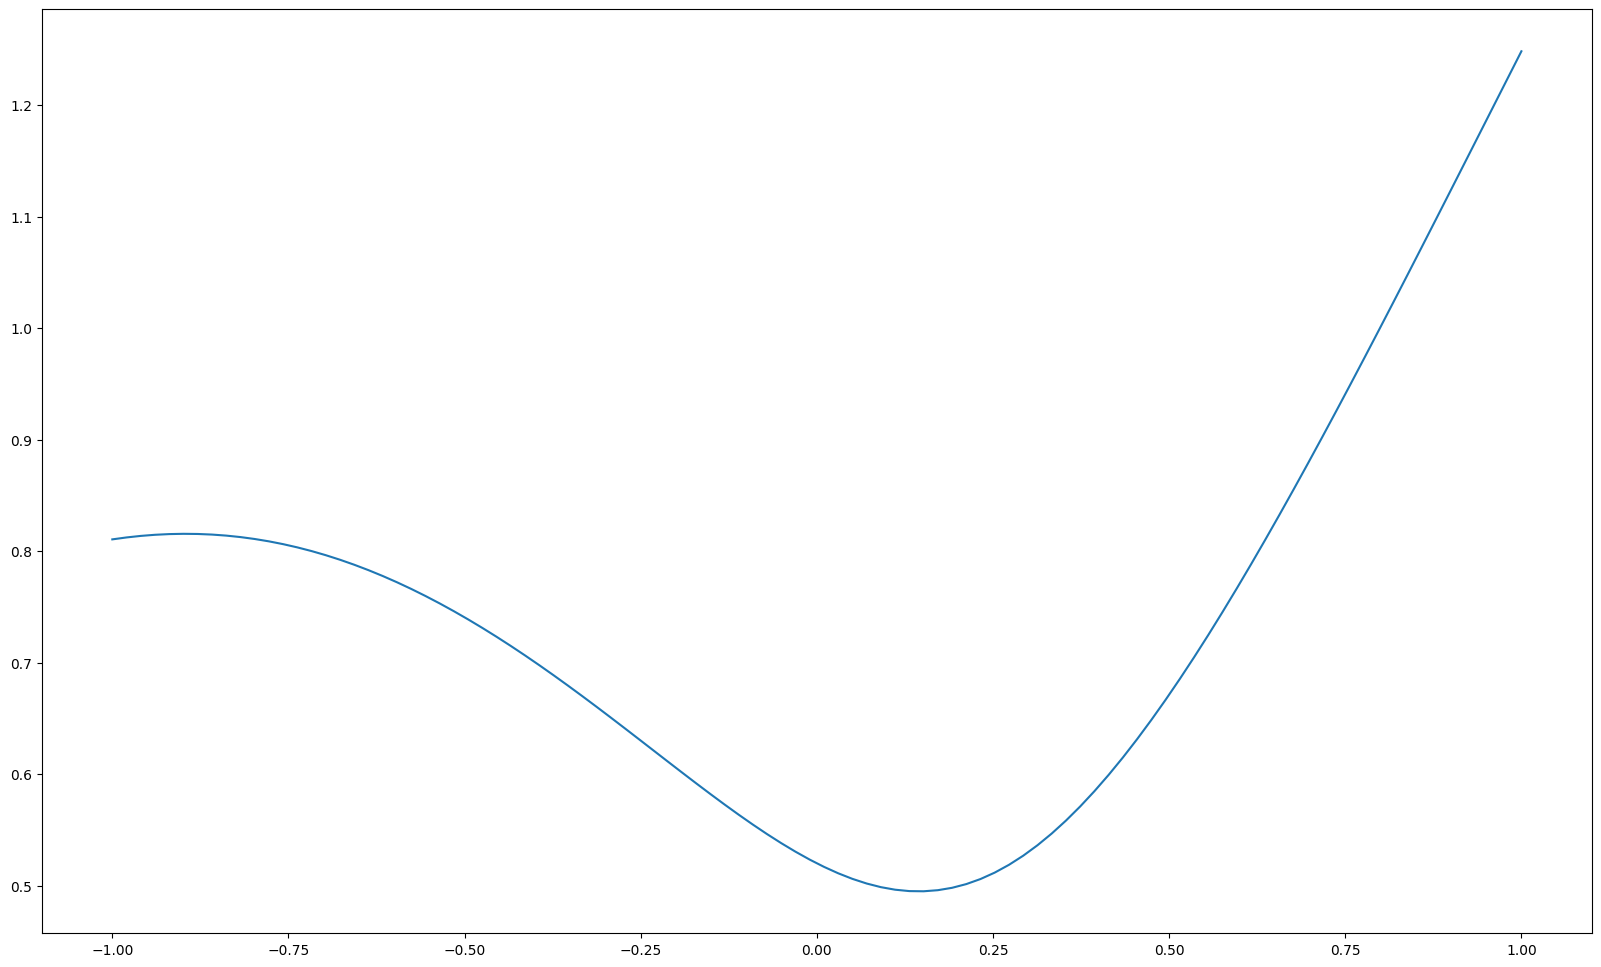

In [23]:
plt.figure(figsize=(20, 12))
x = np.linspace(-1, 1, 100)
y = [func(0, _, _) for _ in x]
plt.plot(x, y)

In [24]:
(T @ q), T@norm_farthest_point_q

(array([[-0.44369266],
        [ 0.7699987 ],
        [-0.45779113]]),
 array([-0.44369266,  0.7699987 , -0.45779113]))

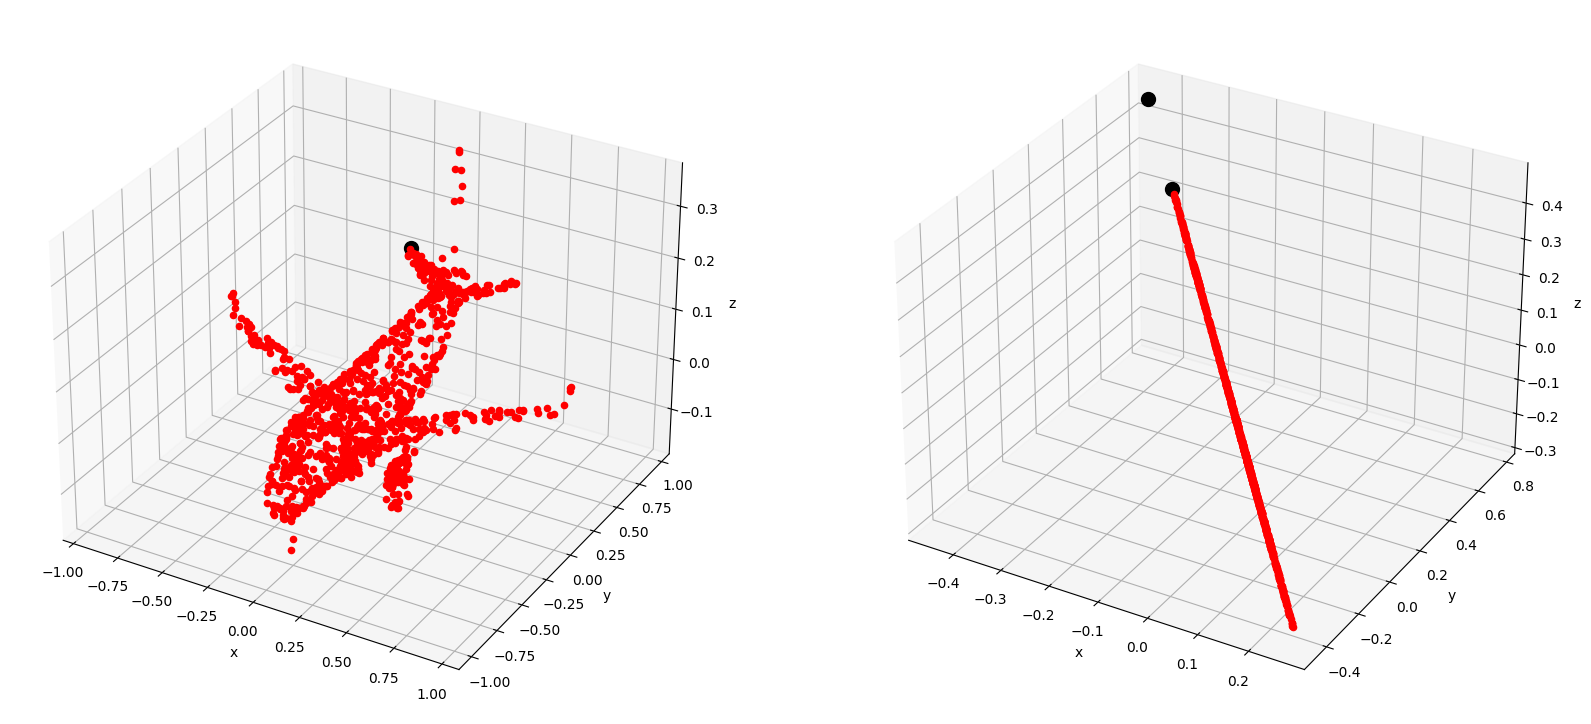

In [25]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for point in P:
    ax.scatter3D(*point, color='red')
    
ax.scatter3D(*farthest_point_p, color='black', s=100)

    
    
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in norm_Q:
    rotated_point = R @ point
    ax.scatter3D(*rotated_point, color='red')

ax.scatter3D(*(R @ norm_farthest_point_q), color='black', s=100)
ax.scatter3D(*(norm_farthest_point_q), color='black', s=100)



    
    
None

In [26]:
q = np.array([-0.759237,  0.517774,  0.710568]).reshape((3, 1))
p = np.array([0.013, 0.849, 0.346]).reshape((3, 1))

In [27]:
# R = p @ q.T @ np.linalg.inv(q @ q.T)
R = p @ np.linalg.pinv(q)

In [28]:
q, p, R @ q

(array([[-0.759237],
        [ 0.517774],
        [ 0.710568]]),
 array([[0.013],
        [0.849],
        [0.346]]),
 array([[0.013],
        [0.849],
        [0.346]]))

In [29]:
transP = P.reshape((3, 1024))
transQ = Q.reshape((3, 1024))
normTransQ = np.array(norm_Q).reshape((3, 1024))
transP, transQ, normTransQ

(array([[ 0.056,  0.367,  0.087, ...,  0.104,  0.017, -0.103],
        [ 0.78 ,  0.079, -0.053, ..., -0.095,  0.001, -0.493],
        [-0.083, -0.065, -0.093, ..., -0.03 , -0.479, -0.073]]),
 array([[-0.552865,  0.24598 ,  0.280693, ...,  0.138632, -0.19614 ,
         -0.749546],
        [ 0.614302,  0.427558, -0.639624, ..., -0.161855, -0.420035,
         -0.380094],
        [-0.3209  , -0.585972, -0.107167, ..., -0.454034, -0.370308,
         -0.318585]]),
 array([[-0.03286866,  0.2559967 ,  0.28070813, ...,  0.1486487 ,
         -0.19612487, -0.22954966],
        [ 0.6243187 ,  0.42757313, -0.11962766, ..., -0.16183987,
          0.09996134, -0.3700773 ],
        [-0.32088487, -0.06597566, -0.0971503 , ...,  0.06596234,
         -0.3602913 , -0.31856987]]))

In [30]:
Q @ P.T @ np.linalg.inv(P @ P.T)

array([[-5.93042472e+12,  5.67052528e+14,  2.57233113e+13, ...,
        -2.27909504e+14, -8.34547856e+14, -1.15683558e+13],
       [-1.73847002e+13,  2.04101600e+14,  1.27645088e+13, ...,
        -4.00897319e+13, -1.33615825e+14, -1.82773215e+13],
       [-7.46902296e+13,  2.95913881e+14,  4.49126826e+13, ...,
        -1.87554023e+14, -1.52686227e+15, -1.68300004e+13],
       ...,
       [-1.04252857e+13,  5.07155760e+13,  5.29992495e+12, ...,
        -7.34277868e+13, -4.74528927e+14,  1.25411922e+13],
       [-2.96257115e+13,  2.66035526e+13,  3.25475303e+13, ...,
        -6.80164056e+13, -1.03458965e+14,  5.40804260e+12],
       [ 6.89731938e+12, -1.13311000e+14, -7.70158592e+12, ...,
         3.26991472e+13,  2.70391249e+14,  4.54589426e+13]])

In [31]:
normTransQ @ transP.T @ np.linalg.inv(transP @ transP.T)

array([[ 0.85824662, -0.00318843,  0.05063846],
       [ 0.01063678,  0.85847467, -0.01221996],
       [-0.01942622,  0.0141311 ,  0.85403228]])

In [38]:
R = transP @ normTransQ.T @ np.linalg.inv(normTransQ @ normTransQ.T)

In [55]:
R = normTransQ @ transP.T @ np.linalg.inv(transP @ transP.T)

In [34]:
R = transQ @ transP.T @ np.linalg.inv(transP @ transP.T)

In [35]:
R = transQ @ transP.T @ np.linalg.inv(transP @ transP.T)

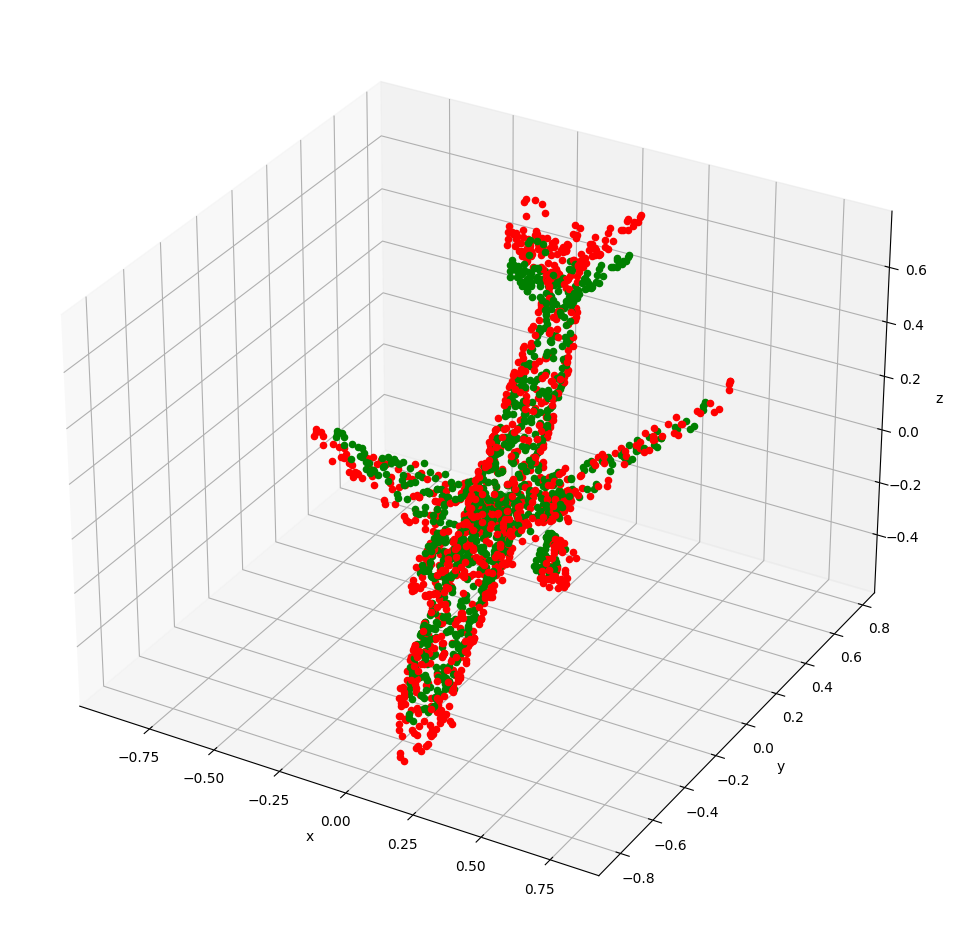

In [56]:
fig = plt.figure(figsize=(20, 12))
    
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in norm_Q:
    rotated_point = R @ point
    ax.scatter3D(*point, color='r')
    ax.scatter3D(*rotated_point, color='g')
    
    
None

In [58]:
transQ

array([[-0.552865,  0.24598 ,  0.280693, ...,  0.138632, -0.19614 ,
        -0.749546],
       [ 0.614302,  0.427558, -0.639624, ..., -0.161855, -0.420035,
        -0.380094],
       [-0.3209  , -0.585972, -0.107167, ..., -0.454034, -0.370308,
        -0.318585]])

In [47]:
Q_test = R @ normTransQ
Q_test

array([[-0.00597704,  0.22845658,  0.24379075, ...,  0.12267715,
        -0.15145516, -0.188217  ],
       [ 0.53320343,  0.36692552, -0.10414723, ..., -0.13846839,
         0.08173847, -0.32207206],
       [-0.28337616, -0.05556239, -0.07348779, ...,  0.06255263,
        -0.31369864, -0.27220195]])

In [51]:
R1 = transP @ Q_test.T @ np.linalg.inv(Q_test @ Q_test.T)

array([[ 1.00000000e+00,  2.23522618e-18,  2.15910403e-17],
       [ 6.78613313e-18,  1.00000000e+00, -6.76354344e-18],
       [ 2.83271752e-17,  4.90369787e-18,  1.00000000e+00]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1024 is different from 3)

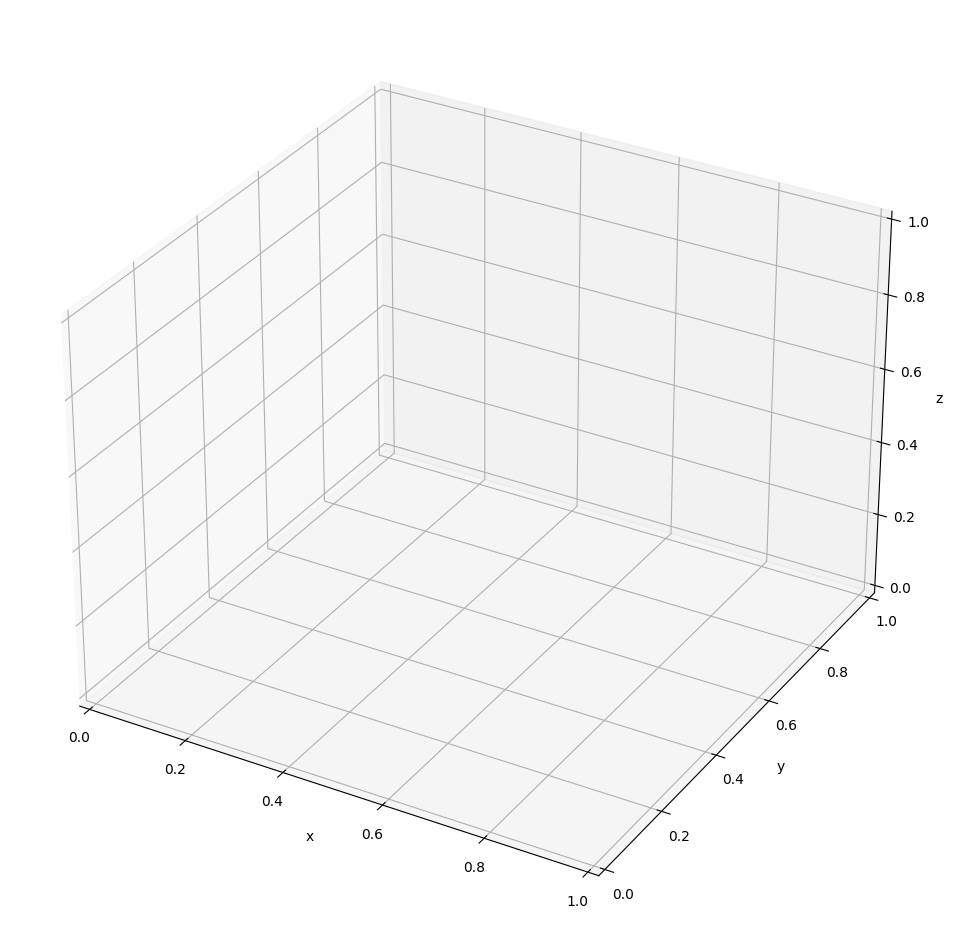

In [52]:
fig = plt.figure(figsize=(20, 12))
    
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in Q_test:
    rotated_point = R1 @ point
    ax.scatter3D(*point, color='r')
    ax.scatter3D(*rotated_point, color='g')
    
    
None

In [153]:
P1 = deepcopy(P)
rand_array = np.array([[np.random.rand()-0.5, np.random.rand()-0.5, np.random.rand()-0.5] for i in range(1000)])
P1 = np.concatenate((P1, rand_array))
np.random.shuffle(P1)

In [151]:
Q1 = deepcopy(Q)
rand_array = np.array([[np.random.rand()*2-1, np.random.rand()*2-1, np.random.rand()*2-1] for i in range(200)])
Q1 = np.concatenate((Q1, rand_array))
np.random.shuffle(Q1)

In [165]:
Q2 = deepcopy(Q)
rand_array = np.array([[np.random.rand()*2-1, np.random.rand()*2-1, np.random.rand()*2-1] for i in range(500)])
Q2 = np.concatenate((Q1[:-500], rand_array))
np.random.shuffle(Q2)

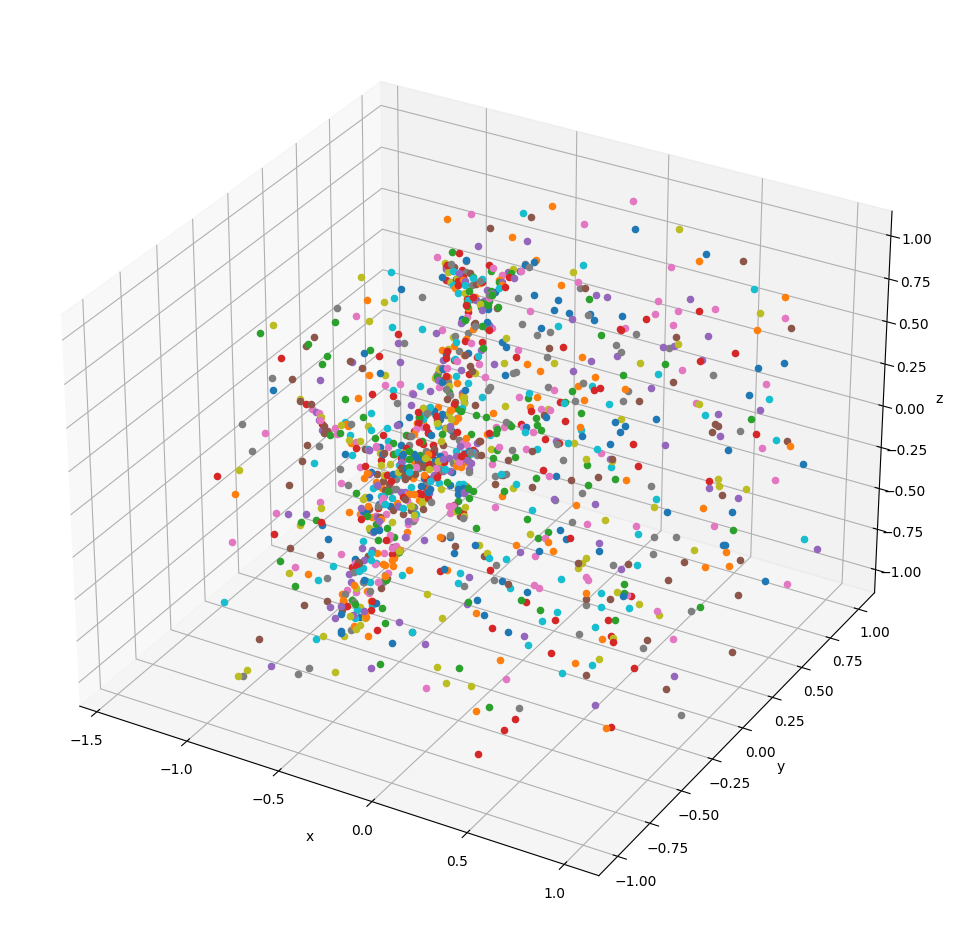

In [166]:
fig = plt.figure(figsize=(20, 12))
    
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in Q2:
    ax.scatter3D(*point)
    
None

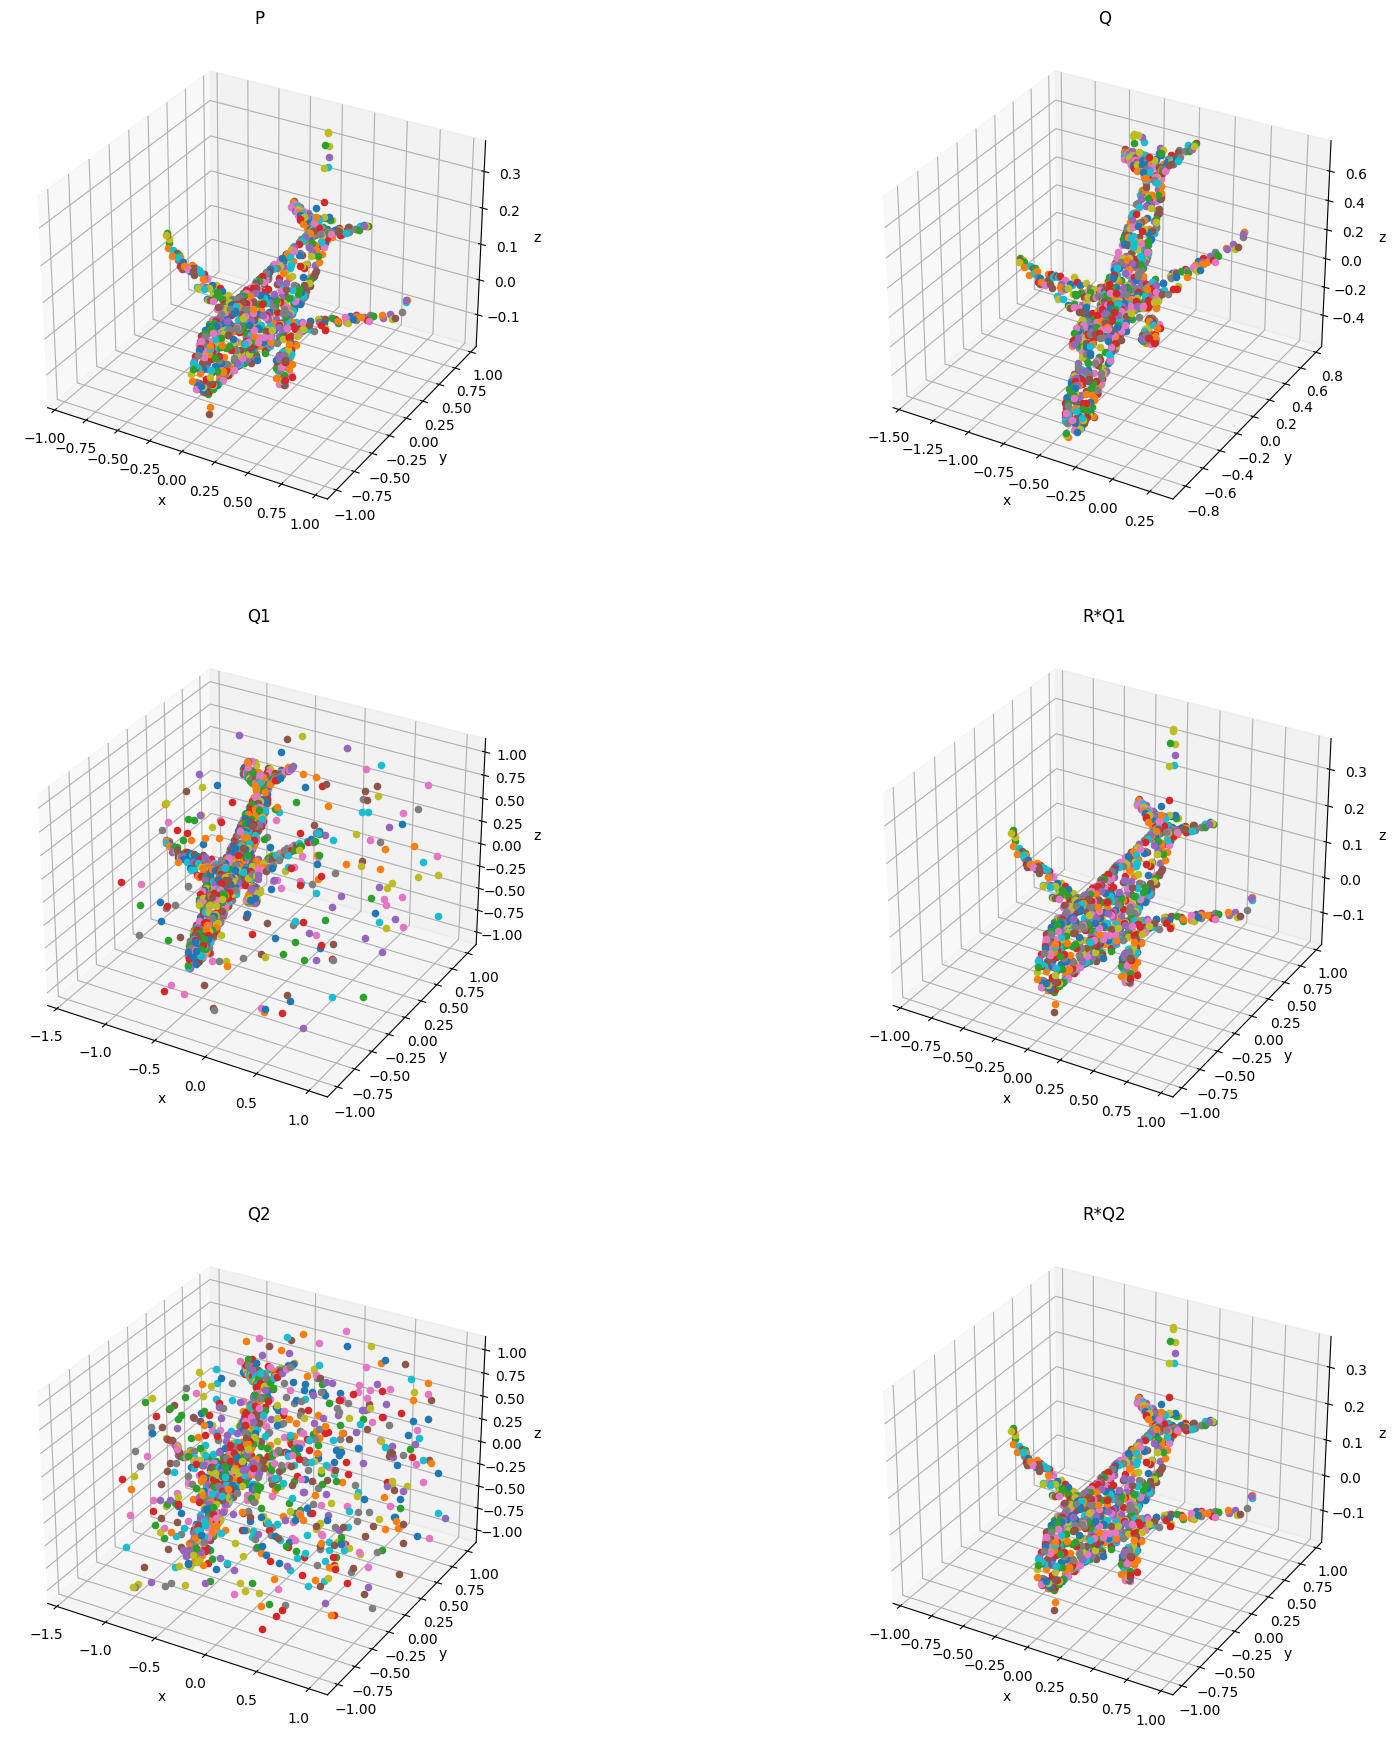

In [167]:
fig = plt.figure(figsize=(20, 22))
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('P')

for point in P:
    ax.scatter3D(*point)
    
ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Q')

for point in Q:
    ax.scatter3D(*point)

    
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Q1')

for point in Q1:
    ax.scatter3D(*point)
    

ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('R*Q1')

R = P.dot(np.linalg.pinv(Q1))
for point in R.dot(Q1):
    ax.scatter3D(*point)
    

ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Q2')

for point in Q2:
    ax.scatter3D(*point)
    
    
ax = fig.add_subplot(3, 2, 6, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('R*Q2')

R = P.dot(np.linalg.pinv(Q2))
for point in R.dot(Q2):
    ax.scatter3D(*point)
    
None

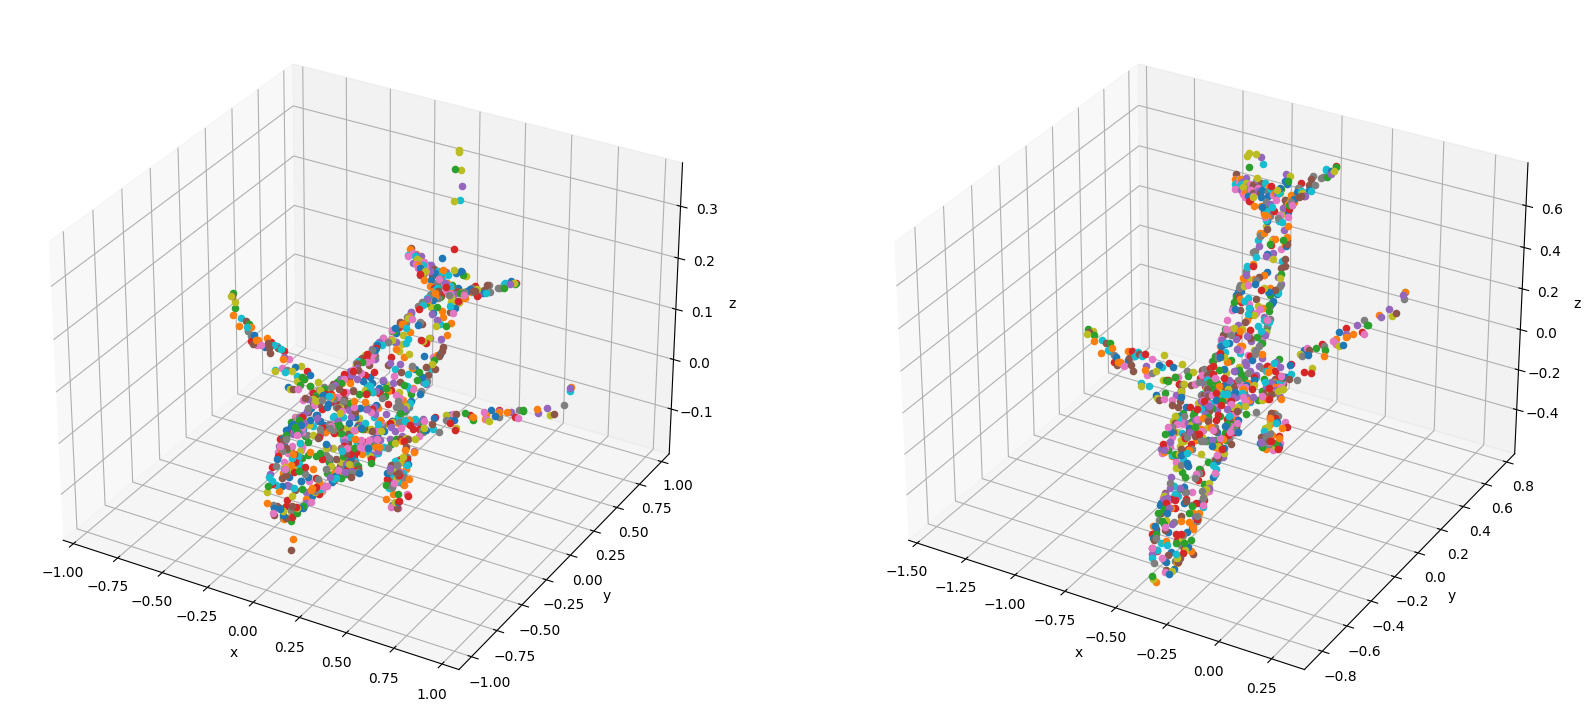

In [415]:
with open('cloud_examples/airplane_no_noise/P.obj') as in_file:
    raw_data = in_file.read()
    
dataP = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

with open('cloud_examples/airplane_no_noise/Q.obj') as in_file:
    raw_data = in_file.read()
    
dataQ = [list(map(float, row.split(' ')[1:])) for row in raw_data.split('\n')][:-1]

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for point in dataP:
    ax.scatter3D(*point)
    
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in dataQ:
    ax.scatter3D(*point)
    
None

In [422]:
P = np.array(dataP)
Q = np.array(dataQ)

array([0.056, 0.367, 0.087])

In [437]:
p = P[0]
data = []
minimum = 1000
min_q = Q[0]
for q in Q:
    if np.linalg.norm(p - q) < minimum:
        minimum = np.linalg.norm(p - q)
        min_q = q
    
    
min_q

array([-0.082609  ,  0.00357279,  0.247861  ])

In [446]:
p1, q1 = p.reshape((3, 1)), min_q.reshape((3, 1))
p1, q1

(array([[0.056],
        [0.367],
        [0.087]]),
 array([[-0.082609  ],
        [ 0.00357279],
        [ 0.247861  ]]))

In [452]:
R = p1 @ q1.T @ np.linalg.inv(q1 @ q1.T)

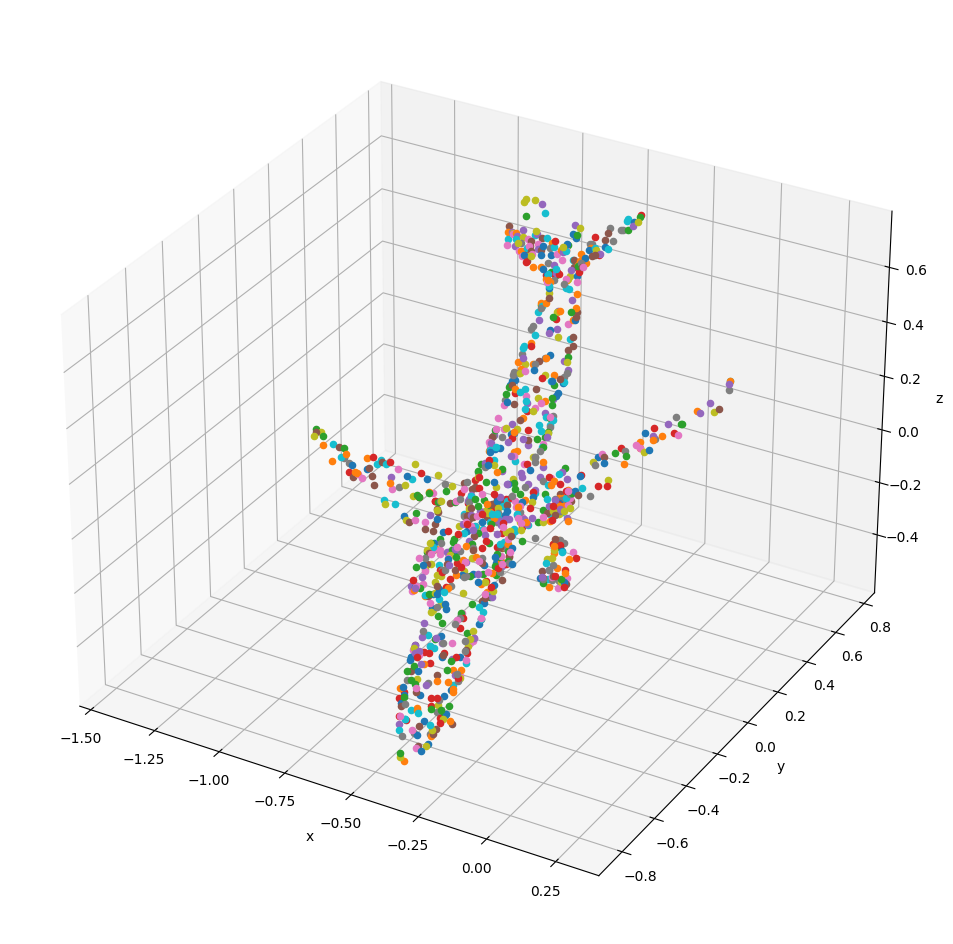

In [451]:
fig = plt.figure(figsize=(20, 12))
    
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for point in Q:
    new_point = point
    ax.scatter3D(*new_point)
    
None

In [221]:
columns = """"addition_in_po",
"attribute5",
"auto_decision_accr_4",
"barter",
"bu_name",
"closed_for_gaap",
"interco",
"org_id",
"parent_org_name",
"po_line_type",
"po_number",
"po_shipment_status",
"po_status",
"purchasing_category",
"reserve_period",
"vendor_name",
""".split(',\n')[:-1]
columns

['"addition_in_po"',
 '"attribute5"',
 '"auto_decision_accr_4"',
 '"barter"',
 '"bu_name"',
 '"closed_for_gaap"',
 '"interco"',
 '"org_id"',
 '"parent_org_name"',
 '"po_line_type"',
 '"po_number"',
 '"po_shipment_status"',
 '"po_status"',
 '"purchasing_category"',
 '"reserve_period"',
 '"vendor_name"']

In [223]:
for i in columns:
    print(f'{i}: [{i}],')

"addition_in_po": ["addition_in_po"],
"attribute5": ["attribute5"],
"auto_decision_accr_4": ["auto_decision_accr_4"],
"barter": ["barter"],
"bu_name": ["bu_name"],
"closed_for_gaap": ["closed_for_gaap"],
"interco": ["interco"],
"org_id": ["org_id"],
"parent_org_name": ["parent_org_name"],
"po_line_type": ["po_line_type"],
"po_number": ["po_number"],
"po_shipment_status": ["po_shipment_status"],
"po_status": ["po_status"],
"purchasing_category": ["purchasing_category"],
"reserve_period": ["reserve_period"],
"vendor_name": ["vendor_name"],
